In [1]:
import pandas as pd

# 1. Data Cleaning

In [2]:
df_historical_data = pd.read_csv('fifa_worldcup_historical_data.csv')
df_fixture = pd.read_csv('fifa_worldcup_fixture22.csv')
df_missing_data = pd.read_csv('fifa_worldcup_missing_data.csv')

In [3]:
df_historical_data

,home,score,away,year
0,France,4–1,Mexico,1930
1,Argentina,1–0,France,1930
2,Chile,3–0,Mexico,1930
3,Chile,1–0,France,1930
4,Argentina,6–3,Mexico,1930
...,...,...,...,...
860,Russia,2–2 (a.e.t.),Croatia,2018
861,France,1–0,Belgium,2018
862,Croatia,2–1 (a.e.t.),England,2018
863,Belgium,2–0,England,2018


In [4]:
df_fixture

,home,score,away,year
0,Qatar,Match 1,Ecuador,2022
1,Senegal,Match 2,Netherlands,2022
2,Qatar,Match 18,Senegal,2022
3,Netherlands,Match 19,Ecuador,2022
4,Ecuador,Match 35,Senegal,2022
...,...,...,...,...
59,Winners Match 51,Match 59,Winners Match 52,2022
60,Winners Match 57,Match 61,Winners Match 58,2022
61,Winners Match 59,Match 62,Winners Match 60,2022
62,Losers Match 61,Match 63,Losers Match 62,2022


In [5]:
df_missing_data

,home,score,away,year
0,Italy,1–0,Austria,1990
1,United States,1–5,Czechoslovakia,1990
2,Italy,1–0,United States,1990
3,Austria,0–1,Czechoslovakia,1990
4,Italy,2–0,Czechoslovakia,1990
...,...,...,...,...
95,NaN,NaN,NaN,2010
96,NaN,NaN,NaN,2010
97,NaN,NaN,NaN,2010
98,NaN,NaN,NaN,2010


## 1.1. Cleaning df_fixture

In [6]:
df_fixture

,home,score,away,year
0,Qatar,Match 1,Ecuador,2022
1,Senegal,Match 2,Netherlands,2022
2,Qatar,Match 18,Senegal,2022
3,Netherlands,Match 19,Ecuador,2022
4,Ecuador,Match 35,Senegal,2022
...,...,...,...,...
59,Winners Match 51,Match 59,Winners Match 52,2022
60,Winners Match 57,Match 61,Winners Match 58,2022
61,Winners Match 59,Match 62,Winners Match 60,2022
62,Losers Match 61,Match 63,Losers Match 62,2022


In [7]:
df_fixture['home'] = df_fixture['home'].str.strip()
df_fixture['away'] = df_fixture['away'].str.strip()

In [8]:
df_fixture

,home,score,away,year
0,Qatar,Match 1,Ecuador,2022
1,Senegal,Match 2,Netherlands,2022
2,Qatar,Match 18,Senegal,2022
3,Netherlands,Match 19,Ecuador,2022
4,Ecuador,Match 35,Senegal,2022
...,...,...,...,...
59,Winners Match 51,Match 59,Winners Match 52,2022
60,Winners Match 57,Match 61,Winners Match 58,2022
61,Winners Match 59,Match 62,Winners Match 60,2022
62,Losers Match 61,Match 63,Losers Match 62,2022


## 1.2. Cleaning df_missing_data and adding it to df_historical_data

In [11]:
# null data
df_missing_data[df_missing_data['home'].isnull()]

,home,score,away,year


In [10]:
# drop null data
df_missing_data.dropna(inplace=True)

In [12]:
# concatenate dfs and clean
df_historical_data = pd.concat([df_historical_data, df_missing_data], ignore_index = True)
df_historical_data.drop_duplicates(inplace = True)
df_historical_data.sort_values('year', inplace = True)
df_historical_data

,home,score,away,year
0,France,4–1,Mexico,1930
17,Uruguay,4–2,Argentina,1930
16,Uruguay,6–1,Yugoslavia,1930
15,Argentina,6–1,United States,1930
14,Paraguay,1–0,Belgium,1930
...,...,...,...,...
829,Serbia,0–2,Brazil,2018
828,Serbia,1–2,Switzerland,2018
827,Brazil,2–0,Costa Rica,2018
825,Costa Rica,0–1,Serbia,2018


## 1.3. Cleaning df_historical_data

In [15]:
# deleting match with walk over
df_historical_data[df_historical_data['home'].str.contains('Sweden') &
                                 df_historical_data['away'].str.contains('Austria')]

,home,score,away,year


In [14]:
delete_index = df_historical_data[df_historical_data['home'].str.contains('Sweden') &
                                 df_historical_data['away'].str.contains('Austria')].index
df_historical_data.drop(index = delete_index, inplace = True)

In [16]:
df_historical_data['score'].str.contains('[^\d–]')

0      False
17     False
16     False
15     False
14     False
       ...  
829    False
828    False
827    False
825    False
812    False
Name: score, Length: 900, dtype: bool

In [17]:
# columns score with not only digits and "-"  --> [^ ]: Matches characters not in brackets (regex)
df_historical_data[df_historical_data['score'].str.contains('[^\d–]')]

,home,score,away,year
27,Italy,1–1 (a.e.t.),Spain,1934
34,Italy,2–1 (a.e.t.),Czechoslovakia,1934
24,Austria,3–2 (a.e.t.),France,1934
48,Brazil,1–1 (a.e.t.),Czechoslovakia,1938
42,Czechoslovakia,3–0 (a.e.t.),Netherlands,1938
...,...,...,...,...
856,Colombia,1–1 (a.e.t.),England,2018
862,Croatia,2–1 (a.e.t.),England,2018
860,Russia,2–2 (a.e.t.),Croatia,2018
852,Croatia,1–1 (a.e.t.),Denmark,2018


In [19]:
df_historical_data['score'] = df_historical_data['score'].str.replace('[^\d–]', '', regex=True)

In [20]:
df_historical_data['score']

0      4–1
17     4–2
16     6–1
15     6–1
14     1–0
      ... 
829    0–2
828    1–2
827    2–0
825    0–1
812    2–2
Name: score, Length: 900, dtype: object

In [21]:
# cleaning score and home/away columns
df_historical_data['home'] = df_historical_data['home'].str.strip()
df_historical_data['away'] = df_historical_data['away'].str.strip()

In [22]:
df_historical_data

,home,score,away,year
0,France,4–1,Mexico,1930
17,Uruguay,4–2,Argentina,1930
16,Uruguay,6–1,Yugoslavia,1930
15,Argentina,6–1,United States,1930
14,Paraguay,1–0,Belgium,1930
...,...,...,...,...
829,Serbia,0–2,Brazil,2018
828,Serbia,1–2,Switzerland,2018
827,Brazil,2–0,Costa Rica,2018
825,Costa Rica,0–1,Serbia,2018


In [23]:
# splitting score columns into home and away goals and drop the original score column
df_historical_data[['HomeGoals', 'AwayGoals']] = df_historical_data['score'].str.split('–', expand = True)

In [25]:
df_historical_data

,home,score,away,year,HomeGoals,AwayGoals
0,France,4–1,Mexico,1930,4,1
17,Uruguay,4–2,Argentina,1930,4,2
16,Uruguay,6–1,Yugoslavia,1930,6,1
15,Argentina,6–1,United States,1930,6,1
14,Paraguay,1–0,Belgium,1930,1,0
...,...,...,...,...,...,...
829,Serbia,0–2,Brazil,2018,0,2
828,Serbia,1–2,Switzerland,2018,1,2
827,Brazil,2–0,Costa Rica,2018,2,0
825,Costa Rica,0–1,Serbia,2018,0,1


In [26]:
df_historical_data.drop('score', axis = 1, inplace = True)

In [27]:
df_historical_data

,home,away,year,HomeGoals,AwayGoals
0,France,Mexico,1930,4,1
17,Uruguay,Argentina,1930,4,2
16,Uruguay,Yugoslavia,1930,6,1
15,Argentina,United States,1930,6,1
14,Paraguay,Belgium,1930,1,0
...,...,...,...,...,...
829,Serbia,Brazil,2018,0,2
828,Serbia,Switzerland,2018,1,2
827,Brazil,Costa Rica,2018,2,0
825,Costa Rica,Serbia,2018,0,1


In [36]:
# rename columns and change data types
df_historical_data .rename(columns ={'home': 'HomeTeam', 'away': 'AwayTeam', 'year': 'Year'}, inplace = True)

df_historical_data = df_historical_data.astype({'HomeGoals': int, 'AwayGoals': int, 'Year': int})

In [37]:
df_historical_data.dtypes

HomeTeam     object
AwayTeam     object
Year          int32
HomeGoals     int32
AwayGoals     int32
dtype: object

In [38]:
df_historical_data

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals
0,France,Mexico,1930,4,1
17,Uruguay,Argentina,1930,4,2
16,Uruguay,Yugoslavia,1930,6,1
15,Argentina,United States,1930,6,1
14,Paraguay,Belgium,1930,1,0
...,...,...,...,...,...
829,Serbia,Brazil,2018,0,2
828,Serbia,Switzerland,2018,1,2
827,Brazil,Costa Rica,2018,2,0
825,Costa Rica,Serbia,2018,0,1


In [41]:
# creating new column "TotalGoals"
df_historical_data ['TotalGoals'] = df_historical_data['HomeGoals'] + df_historical_data['AwayGoals'] 

In [42]:
df_historical_data

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
0,France,Mexico,1930,4,1,5
17,Uruguay,Argentina,1930,4,2,6
16,Uruguay,Yugoslavia,1930,6,1,7
15,Argentina,United States,1930,6,1,7
14,Paraguay,Belgium,1930,1,0,1
...,...,...,...,...,...,...
829,Serbia,Brazil,2018,0,2,2
828,Serbia,Switzerland,2018,1,2,3
827,Brazil,Costa Rica,2018,2,0,2
825,Costa Rica,Serbia,2018,0,1,1


# 2. Export clean dataframe

In [43]:
df_historical_data.to_csv('clean_fifa_worldcup_historical_data.csv', index = False)
df_fixture.to_csv('clean_fifa_worldcup_fixture22.csv', index = False)

# 3. Extra verifications

In [44]:
# verify number of matches per competition
years = [1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018]

for year in years:
    print(year, len(df_historical_data[df_historical_data['Year']==year]))

1930 18
1934 17
1938 18
1950 22
1954 26
1958 35
1962 32
1966 32
1970 32
1974 38
1978 38
1982 52
1986 52
1990 52
1994 52
1998 64
2002 64
2006 64
2010 64
2014 64
2018 64


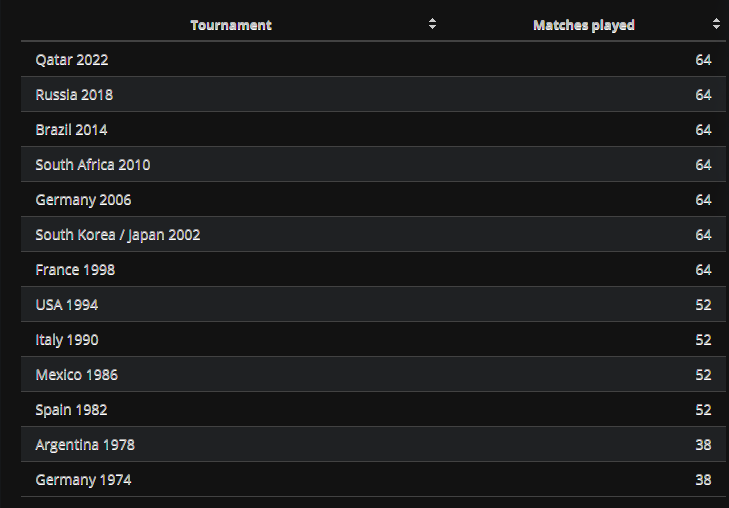

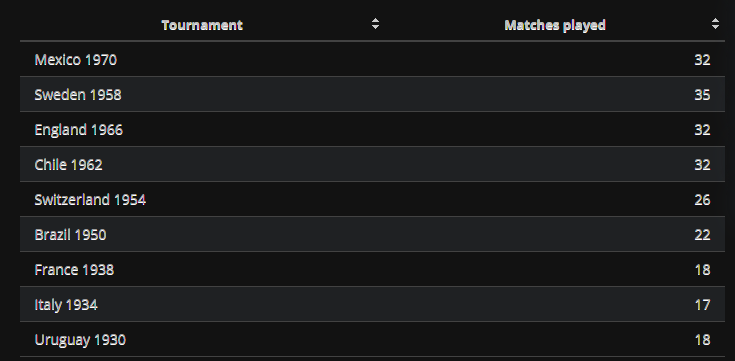